## Google Analytics
- BIgQuery
- Handling JSON data

[ga link]('https://console.cloud.google.com/getting-started?pli=1')

**conda install pandas-gbq -c conda-forge**

In [1]:
from pandas.io import gbq

In [2]:
query = """
SELECT * FROM 'trans-shuttle-297200.df.data' LIMIT 1000
"""

In [ ]:
data = gbq.read_gbq(query, project_id = 'trans-shuttle-297200')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
from pandas.io.json import json_normalize

In [48]:
data = pd.read_csv('ga.csv')

In [3]:
data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Direct,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.194190e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",6194193421514403509_1472843572,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""11...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1472843572,1,1472843572
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5.327170e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5327166854580374902_1472844906,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""10...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472844906,3,1472844906
2,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8.885050e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",8885051388942907862_1472827393,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""11...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472827393,7,1472827393
3,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1.854680e+17,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0185467632009737931_1472846398,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""12...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472846398,6,1472846398
4,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3.244890e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",3244885836845029978_1472824817,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""14...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472824817,4,1472824817


In [6]:
sample = data.iloc[0]['device']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   channelGrouping       11515 non-null  object 
 1   date                  11515 non-null  int64  
 2   device                11515 non-null  object 
 3   fullVisitorId         11515 non-null  float64
 4   geoNetwork            11515 non-null  object 
 5   sessionId             11515 non-null  object 
 6   socialEngagementType  11515 non-null  object 
 7   totals                11515 non-null  object 
 8   trafficSource         11515 non-null  object 
 9   visitId               11515 non-null  int64  
 10  visitNumber           11515 non-null  int64  
 11  visitStartTime        11515 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 1.1+ MB


### convert json string into json
json.loads()

In [8]:
json.loads(sample)

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Linux',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [13]:
data['device'].apply(json.loads)

0        {'browser': 'Chrome', 'browserVersion': 'not a...
1        {'browser': 'Chrome', 'browserVersion': 'not a...
2        {'browser': 'Chrome', 'browserVersion': 'not a...
3        {'browser': 'Chrome', 'browserVersion': 'not a...
4        {'browser': 'Chrome', 'browserVersion': 'not a...
                               ...                        
11510    {'browser': 'Chrome', 'browserVersion': 'not a...
11511    {'browser': 'Chrome', 'browserVersion': 'not a...
11512    {'browser': 'Chrome', 'browserVersion': 'not a...
11513    {'browser': 'Firefox', 'browserVersion': 'not ...
11514    {'browser': 'Chrome', 'browserVersion': 'not a...
Name: device, Length: 11515, dtype: object

In [14]:
data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Direct,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.194190e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",6194193421514403509_1472843572,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""11...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1472843572,1,1472843572
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5.327170e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5327166854580374902_1472844906,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""10...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472844906,3,1472844906
2,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8.885050e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",8885051388942907862_1472827393,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""11...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472827393,7,1472827393
3,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1.854680e+17,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0185467632009737931_1472846398,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""12...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472846398,6,1472846398
4,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3.244890e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",3244885836845029978_1472824817,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""14...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472824817,4,1472824817


In [16]:
json_columns = ['device', 'geoNetwork', 'totals', 'trafficSource']

In [49]:
# convert json string into json when initializing dataFrame
# dictionary comprehension
data = pd.read_csv('ga.csv', converters = {column: json.loads for column in json_columns})

In [20]:
data.iloc[0]['totals']

{'visits': '1',
 'hits': '11',
 'pageviews': '11',
 'transactionRevenue': '37860000',
 'newVisits': '1'}

### convert json object into dataFrame
json_normalize()

In [32]:
device = json_normalize(data['device'])
geoNetwork = json_normalize(data['geoNetwork'])
totals = json_normalize(data['totals'])
trafficSource = json_normalize(data['trafficSource'])

<ipython-input-32-786960f73172>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  device = json_normalize(data['device'])
<ipython-input-32-786960f73172>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  geoNetwork = json_normalize(data['geoNetwork'])
<ipython-input-32-786960f73172>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  totals = json_normalize(data['totals'])
<ipython-input-32-786960f73172>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  trafficSource = json_normalize(data['trafficSource'])


In [24]:
totals

,visits,hits,pageviews,transactionRevenue,newVisits
0,1,11,11,37860000,1
1,1,11,10,306670000,NaN
2,1,13,11,68030000,NaN
3,1,13,12,26250000,NaN
4,1,17,14,574150000,NaN
...,...,...,...,...,...
11510,1,61,48,335260000,NaN
11511,1,66,30,599950000,NaN
11512,1,122,90,30750000,1
11513,1,130,90,69390000,NaN


#### before joining dataFrames, rename columns for avoiding dupe value

In [33]:
device.columns = ["device."+i for i in device.columns]

In [34]:
device

,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
4,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11510,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
11511,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
11512,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
11513,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop


In [36]:
geoNetwork.columns = ["geoNetwork."+i for i in geoNetwork.columns]
totals.columns = ["totals."+i for i in totals.columns]
trafficSource.columns = ["trafficSource."+i for i in trafficSource.columns]

In [37]:
geoNetwork

,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation
0,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
...,...,...,...,...,...,...,...,...,...,...,...
11510,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
11511,Americas,Northern America,United States,Texas,Austin TX,Austin,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
11512,Asia,Eastern Asia,South Korea,Seoul,(not set),Seoul,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
11513,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,optonline.net,not available in demo dataset,not available in demo dataset,not available in demo dataset


#### joining dataFrames converted from json
drop the json string column

In [39]:
pd.concat([data, device, geoNetwork, totals, trafficSource], axis = 1).drop(json_columns, axis=1)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,...,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
4,Referral,20160902,3.244890e+18,3244885836845029978_1472824817,Not Socially Engaged,1472824817,4,1472824817,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11510,Referral,20170104,6.849600e+18,6849604863010168468_1483566314,Not Socially Engaged,1483566314,10,1483566314,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11511,Referral,20170104,2.119870e+17,0211986650009953276_1483568879,Not Socially Engaged,1483568879,2,1483568879,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11512,Referral,20170104,9.981560e+18,9981562221973608723_1483576938,Not Socially Engaged,1483576938,1,1483576938,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11513,Direct,20170104,9.631260e+17,963126344221316701_1483552674,Not Socially Engaged,1483552674,3,1483552674,Firefox,not available in demo dataset,...,True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### converting json using list comprehension and for loop

In [50]:
for i in json_columns:
    # convert json into dataFrame
    json_df = json_normalize(data[i])
    
    # rename json dataFrame columns
    json_df.columns = [f'{i}.{j}' for j in json_df.columns]
    
    # drop json string column
    # merge the original dataFrame with json dataFrame 
    data = pd.concat([data.drop(i, axis = 1), json_df], axis = 1)

<ipython-input-50-2691f7ac269c>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_df = json_normalize(data[i])


In [52]:
pd.set_option('display.max_columns', 100)

In [54]:
data.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,37860000,1,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,306670000,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,68030000,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available 

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   fullVisitorId                                      11515 non-null  float64
 3   sessionId                                          11515 non-null  object 
 4   socialEngagementType                               11515 non-null  object 
 5   visitId                                            11515 non-null  int64  
 6   visitNumber                                        11515 non-null  int64  
 7   visitStartTime                                     11515 non-null  int64  
 8   device.browser                                     11515 non-null  object 
 9   device

### convert data types of 'totals' columns into integer

In [64]:
for i in data.columns:
    if (i.startswith('totals')):
        data[i] = pd.to_numeric(data[i])

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   fullVisitorId                                      11515 non-null  float64
 3   sessionId                                          11515 non-null  object 
 4   socialEngagementType                               11515 non-null  object 
 5   visitId                                            11515 non-null  int64  
 6   visitNumber                                        11515 non-null  int64  
 7   visitStartTime                                     11515 non-null  int64  
 8   device.browser                                     11515 non-null  object 
 9   device

In [66]:
data.describe()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits
count,1.151500e+04,1.151500e+04,1.151500e+04,11515.000000,1.151500e+04,11515.0,11515.000000,11515.000000,1.151500e+04,4465.0
mean,2.016622e+07,4.503303e+18,1.485876e+09,4.083196,1.485876e+09,1.0,36.274251,28.330439,1.337448e+08,1.0
std,4.687452e+03,3.062080e+18,9.308961e+06,12.508556,9.308963e+06,0.0,30.269294,21.727555,4.482852e+08,0.0
min,2.016080e+07,2.131310e+14,1.470046e+09,1.000000,1.470046e+09,1.0,2.000000,2.000000,1.000000e+04,1.0
25%,2.016110e+07,1.639590e+18,1.478054e+09,1.000000,1.478054e+09,1.0,19.000000,16.000000,2.493000e+07,1.0
50%,2.017013e+07,4.377180e+18,1.485554e+09,2.000000,1.485554e+09,1.0,28.000000,23.000000,4.945000e+07,1.0
75%,2.017050e+07,7.184570e+18,1.493948e+09,4.000000,1.493948e+09,1.0,44.000000,34.000000,1.076550e+08,1.0
max,2.017080e+07,9.999000e+18,1.501652e+09,315.000000,1.501652e+09,1.0,500.000000,469.000000,2.312950e+10,1.0


C:\Users\Youngin Lee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totals.transactionRevenue', ylabel='Density'>

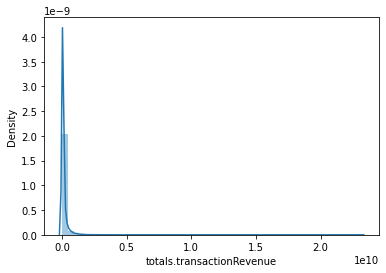

In [68]:
sns.distplot(data['totals.transactionRevenue'])

C:\Users\Youngin Lee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totals.transactionRevenue', ylabel='Density'>

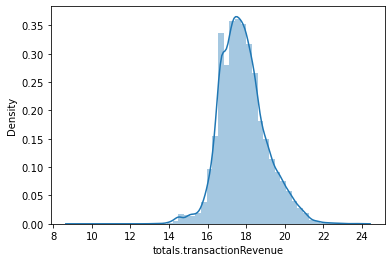

In [72]:
sns.distplot(np.log(data['totals.transactionRevenue']))

In [73]:
data['totals.transactionRevenue'] = np.log(data['totals.transactionRevenue'])

In [74]:
data

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,17.449406,1.0,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,19.541283,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,18.035459,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not availa

In [77]:
drop_list = ['fullVisitorId', 'sessionId', 'visitId', 'visitStartTime']

In [78]:
data.drop(drop_list, axis = 1, inplace = True)

In [79]:
data

,channelGrouping,date,socialEngagementType,visitNumber,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,Not Socially Engaged,1,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,17.449406,1.0,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,Not Socially Engaged,3,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,19.541283,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,Not Socially Engaged,7,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,18.035459,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,Not Socially Engaged,6,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,not available in demo dataset,(not set),not available in demo da

In [89]:
data.isna().mean()

channelGrouping                                      0.000000
date                                                 0.000000
socialEngagementType                                 0.000000
visitNumber                                          0.000000
device.browser                                       0.000000
device.browserVersion                                0.000000
device.browserSize                                   0.000000
device.operatingSystem                               0.000000
device.operatingSystemVersion                        0.000000
device.isMobile                                      0.000000
device.mobileDeviceBranding                          0.000000
device.mobileDeviceModel                             0.000000
device.mobileInputSelector                           0.000000
device.mobileDeviceInfo                              0.000000
device.mobileDeviceMarketingName                     0.000000
device.flashVersion                                  0.000000
device.l

#### when theres too many NaN, consider dropping the whole column

In [85]:
na_list = data.isna().mean()[data.isna().mean() > 0.9].index

In [86]:
data.drop(na_list, axis=1, inplace=True)

In [88]:
data.isna().mean()

channelGrouping                                      0.000000
date                                                 0.000000
socialEngagementType                                 0.000000
visitNumber                                          0.000000
device.browser                                       0.000000
device.browserVersion                                0.000000
device.browserSize                                   0.000000
device.operatingSystem                               0.000000
device.operatingSystemVersion                        0.000000
device.isMobile                                      0.000000
device.mobileDeviceBranding                          0.000000
device.mobileDeviceModel                             0.000000
device.mobileInputSelector                           0.000000
device.mobileDeviceInfo                              0.000000
device.mobileDeviceMarketingName                     0.000000
device.flashVersion                                  0.000000
device.l

In [95]:
na_list2 = data.isna().mean()[data.isna().mean() > 0].index

In [97]:
na_list2

Index(['totals.newVisits', 'trafficSource.isTrueDirect',
       'trafficSource.keyword', 'trafficSource.referralPath'],
      dtype='object')

In [102]:
for i in na_list2:
    print(f'✔{i}\n {data[i].value_counts()}')

✔totals.newVisits
 1.0    4465
Name: totals.newVisits, dtype: int64
✔trafficSource.isTrueDirect
 True    7004
Name: trafficSource.isTrueDirect, dtype: int64
✔trafficSource.keyword
 (not provided)                             3387
6qEhsCssdK0z36ri                            261
google merchandise store                     59
1hZbAqLCbjwfgOH7                             56
Google Merchandise                           45
(Remarketing/Content targeting)               9
+Google +Merchandise                          7
1X4Me6ZKNV0zg-jV                              6
google store                                  3
+Google +Gear                                 3
+Google +Swag                                 3
google stickers                               2
google store merchandise                      2
google apparel store                          2
GOOGLE MERCHANDISE                            2
category_l1==166                              2
youtube merch                                 2
+go

In [103]:
data.drop(['totals.newVisits', 'trafficSource.isTrueDirect'], axis=1, inplace = True)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 41 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   socialEngagementType                               11515 non-null  object 
 3   visitNumber                                        11515 non-null  int64  
 4   device.browser                                     11515 non-null  object 
 5   device.browserVersion                              11515 non-null  object 
 6   device.browserSize                                 11515 non-null  object 
 7   device.operatingSystem                             11515 non-null  object 
 8   device.operatingSystemVersion                      11515 non-null  object 
 9   device

### replace NaN with value

In [105]:
data['trafficSource.keyword']=data['trafficSource.keyword'].fillna('unknown')

In [106]:
data.drop('trafficSource.referralPath', axis=1, inplace = True)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   socialEngagementType                               11515 non-null  object 
 3   visitNumber                                        11515 non-null  int64  
 4   device.browser                                     11515 non-null  object 
 5   device.browserVersion                              11515 non-null  object 
 6   device.browserSize                                 11515 non-null  object 
 7   device.operatingSystem                             11515 non-null  object 
 8   device.operatingSystemVersion                      11515 non-null  object 
 9   device

### handling categorical datas
pandas.get_dummies

In [115]:
for i in data.columns:
    if (data[i].dtype == 'O'):
        print(i, data[i].nunique())

channelGrouping 8
socialEngagementType 1
device.browser 9
device.browserVersion 1
device.browserSize 1
device.operatingSystem 7
device.operatingSystemVersion 1
device.mobileDeviceBranding 1
device.mobileDeviceModel 1
device.mobileInputSelector 1
device.mobileDeviceInfo 1
device.mobileDeviceMarketingName 1
device.flashVersion 1
device.language 1
device.screenColors 1
device.screenResolution 1
device.deviceCategory 3
geoNetwork.continent 6
geoNetwork.subContinent 19
geoNetwork.country 69
geoNetwork.region 79
geoNetwork.metro 46
geoNetwork.city 134
geoNetwork.cityId 1
geoNetwork.networkDomain 732
geoNetwork.latitude 1
geoNetwork.longitude 1
geoNetwork.networkLocation 1
trafficSource.campaign 7
trafficSource.source 44
trafficSource.medium 7
trafficSource.adwordsClickInfo.criteriaParameters 1
trafficSource.keyword 36


In [116]:
count = pd.DataFrame(columns = ['count'])

for i in data.columns:
    if (data[i].dtype == 'O'):
        count.loc[i] = data[i].nunique()

In [117]:
count

,count
channelGrouping,8
socialEngagementType,1
device.browser,9
device.browserVersion,1
device.browserSize,1
device.operatingSystem,7
device.operatingSystemVersion,1
device.mobileDeviceBranding,1
device.mobileDeviceModel,1
device.mobileInputSelector,1


In [122]:
value_one = count[count['count'] == 1].index

In [123]:
data.drop(value_one, axis=1, inplace = True)

In [126]:
for i in data.columns:
    if (data[i].dtype == 'O'):
        print(i, data[i].nunique())

channelGrouping 8
device.browser 9
device.operatingSystem 7
device.deviceCategory 3
geoNetwork.continent 6
geoNetwork.subContinent 19
geoNetwork.country 69
geoNetwork.region 79
geoNetwork.metro 46
geoNetwork.city 134
geoNetwork.networkDomain 732
trafficSource.campaign 7
trafficSource.source 44
trafficSource.medium 7
trafficSource.keyword 36


In [127]:
value_large = count[count['count'] > 70].index

In [128]:
data.drop(value_large, axis=1, inplace=True)

In [129]:
for i in data.columns:
    if (data[i].dtype == 'O'):
        print(i, data[i].nunique())

channelGrouping 8
device.browser 9
device.operatingSystem 7
device.deviceCategory 3
geoNetwork.continent 6
geoNetwork.subContinent 19
geoNetwork.country 69
geoNetwork.metro 46
trafficSource.campaign 7
trafficSource.source 44
trafficSource.medium 7
trafficSource.keyword 36


### after filtering categorical values that has too little or too many options, create dummies

In [133]:
data = pd.get_dummies(data, columns = data.columns[[data[i].dtype == 'O' for i in data.columns]], drop_first=True)

In [134]:
data

,date,visitNumber,device.isMobile,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,device.browser_Android Webview,device.browser_Chrome,device.browser_Edge,device.browser_Firefox,device.browser_Internet Explorer,device.browser_Opera,device.browser_Safari,device.browser_Safari (in-app),device.operatingSystem_Chrome OS,device.operatingSystem_Linux,device.operatingSystem_Macintosh,device.operatingSystem_Windows,device.operatingSystem_Windows Phone,device.operatingSystem_iOS,device.deviceCategory_mobile,device.deviceCategory_tablet,geoNetwork.continent_Africa,geoNetwork.continent_Americas,geoNetwork.continent_Asia,geoNetwork.continent_Europe,geoNetwork.continent_Oceania,geoNetwork.subContinent_Australasia,geoNetwork.subContinent_Caribbean,geoNetwork.subContinent_Central America,geoNetwork.subContinent_Central Asia,geoNetwork.subContinent_Eastern Africa,geoNetwork.subContinent_Eastern Asia,geoNetwork.subContinent_Eastern Europe,geoNetwork.subContinent_Northern Africa,geoNetwork.subContinent_Northern America,geoNetwork.subContinent_Northern Europe,geoNetwork.subContinent_South America,geoNetwork.subContinent_Southeast Asia,geoNetwork.subContinent_Southern Africa,geoNetwork.subContinent_Southern Asia,geoNetwork.subContinent_Southern Europe,...,trafficSource.source_search.xfinity.com,trafficSource.source_seroundtable.com,trafficSource.source_siliconvalley.about.com,trafficSource.source_sites.google.com,trafficSource.source_t.co,trafficSource.source_trainup.withgoogle.com,trafficSource.source_us-mg5.mail.yahoo.com,trafficSource.source_yahoo,trafficSource.source_youtube.com,trafficSource.medium_(not set),trafficSource.medium_affiliate,trafficSource.medium_cpc,trafficSource.medium_cpm,trafficSource.medium_organic,trafficSource.medium_referral,trafficSource.keyword_(automatic matching),trafficSource.keyword_(not provided),trafficSource.keyword_+Google +Gear,trafficSource.keyword_+Google +Merchandise,trafficSource.keyword_+Google +Swag,trafficSource.keyword_+google +coffee +mug,trafficSource.keyword_+google +merch,trafficSource.keyword_+google +merchandise +store,trafficSource.keyword_+google +store,trafficSource.keyword_+google +stores,trafficSource.keyword_+google+tshirts,trafficSource.keyword_1X4Me6ZKNV0zg-jV,trafficSource.keyword_1hZbAqLCbjwfgOH7,trafficSource.keyword_6qEhsCssdK0z36ri,trafficSource.keyword_GOOGLE MERCHANDISE,trafficSource.keyword_Google Merchandise,trafficSource.keyword_YouTube Merchandise,trafficSource.keyword_Youtube merchandise store,trafficSource.keyword_category_l1==166,trafficSource.keyword_google apparel store,trafficSource.keyword_google items for sale,trafficSource.keyword_google men's hoodie pullover,trafficSource.keyword_google merch,trafficSource.keyword_google merchandise,trafficSource.keyword_google merchandise store,trafficSource.keyword_google shirt,trafficSource.keyword_google stickers,trafficSource.keyword_google store,trafficSource.keyword_google store merchandise,trafficSource.keyword_googlemerchandisestore,trafficSource.keyword_googlesupport,trafficSource.keyword_unknown,trafficSource.keyword_you tube trucker cap google merchandise,trafficSource.keyword_youtube merch,trafficSource.keyword_youtube merchandise store
0,20160902,1,False,1,11,11,17.449406,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,20160902,3,False,1,11,10,19.541283,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20160902,7,False,1,13,11,18.035459,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0

## Modeling data

In [135]:
from sklearn.model_selection import train_test_split

In [137]:
X = data.drop('totals.transactionRevenue', axis = 1)
y = data['totals.transactionRevenue']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [139]:
# random forest
from sklearn.ensemble import RandomForestRegressor

In [140]:
model = RandomForestRegressor(max_depth=10, n_estimators = 1000)

In [141]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000)

In [142]:
pred = model.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_error

In [145]:
mean_squared_error(y_test, pred) ** 0.5 # lognormal distribution

1.0528731405223966

C:\Users\Youngin Lee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totals.transactionRevenue'>

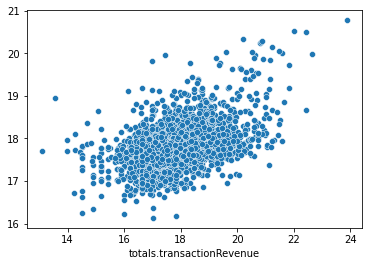

In [146]:
sns.scatterplot(y_test, pred)